1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

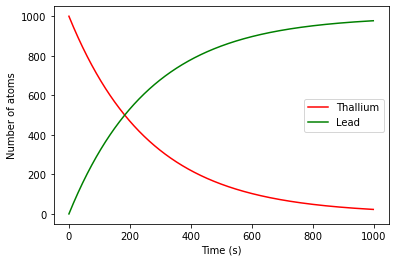

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_T = 1000 #samples of Thallium
n_L = 0 #initial samples of lead
tau = 3.052*60
T = 1000
atoms_t = np.zeros((T,))
atoms_l = np.zeros((T,))
for t in range(T):
    atoms_t[t,]=n_T-((1-2**(-t/tau))*n_T)
    atoms_l[t,]=(1-2**(-t/tau))*n_T

fig, ax = plt.subplots()
ax.plot(range(n_T),atoms_t, color ='r', label='Thallium')
ax.plot(range(n_T),atoms_l, color='g', label='Lead')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Number of atoms')
ax.legend()



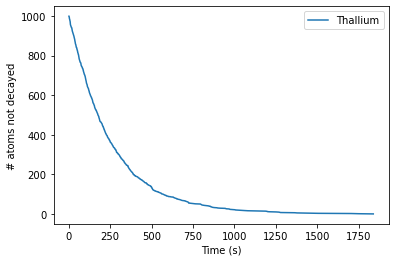

In [2]:
from scipy import stats
import numpy.random as npr
npr.seed(14342)

def time(x,tau):
    t=(-tau*np.log(1-x))/np.log(2)
    return t

tau=3.052*60 
n_T=1000
n_L=0
T=1000

t_dec=[]
atoms_t=[]

for count in range(0,n_T):
    t = time(np.random.uniform(0,1),tau)
    t_dec.append(t)
    n_T-=1
    atoms_t.append(n_T)
        
plt.plot(np.sort(t_dec),atoms_t, label='Thallium')
plt.xlabel('Time (s)')
plt.ylabel('# atoms not decayed')
plt.legend()


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

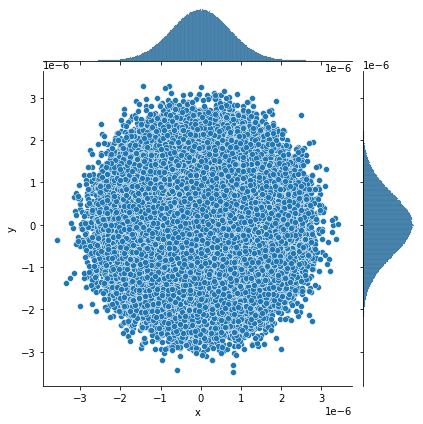

In [3]:
from scipy import constants
import pandas as pd
import seaborn as sns 

a_0 = constants.physical_constants['Bohr radius'][0]
Z = 79
eps_0 = constants.epsilon_0
e = constants.e
E = 7.7 *10**6*e
std = a_0/100
alpha = 10**6

#creation of the b distribution and verification through seaborn plot:
b = npr.multivariate_normal([0,0],[[std,0],[0,std]],alpha)          #NOT THE BEST WAY TO DO IT
df = pd.DataFrame(b, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df);


In [4]:
def gaussian(num):
    r = np.sqrt(-2*std*std*np.log(1-npr.random(num)))   #BETTER
    theta = 2*np.pi*np.random.random(num)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x,y

#when theta>pi/2, tan(theta/2)>1, from the def of tan(theta/2) comes the bound on b:
bound = (Z*e*e)/(2*np.pi*eps_0*E)

x,y = gaussian(alpha)
b = np.sqrt(x*x+y*y)
bounce = b[b<bound]
print("Bounced particles:", len(bounce))
print("Bounce fraction :", len(bounce)/alpha)

Bounced particles: 1557
Bounce fraction : 0.001557


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

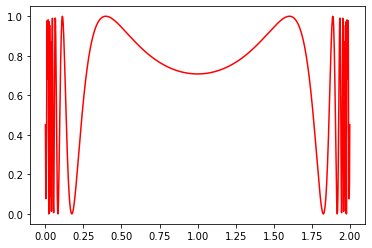

In [5]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

x = np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'r-')

In [15]:
N = 100000
count = 0
for i in range(N):
    x = 2*np.random.random()   #x goes from 0 to 2, y from 0 to 1; A=2 (npr.random() generates in (0,1))
    y = np.random.random()
    if y<f(x): count+=1
I=2*count/N
print("MonteCarlo hit-miss integral:", I)


#evaluation of the error

import scipy.integrate as integrate
integral = integrate.quad(f,0,2)
print("Integral computed directly:", integral[0])
print("MonteCarlo hit-miss error:", 1-I/integral[0])

MonteCarlo hit-miss integral: 1.45016
Integral computed directly: 1.4516877509810684
MonteCarlo hit-miss error: 0.001052396412407619


/tmp/ipykernel_3572/3312098849.py:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = integrate.quad(f,0,2)


In [19]:
#Mean value method

a = 0
b = 2
N = 100000

sum_f = 0
for i in range(N):
    x = 2*npr.random()
    sum_f+=f(x)
res = ((b-a)/N)*sum_f

print("Integral with mean value method:", res)
print("Mean value error:", 1-res/integral[0])

print("\n\n Hit-miss performs better!")

Integral with mean value method: 1.4514097933726493
Mean value error: 0.00019147203538172342


 Hit-miss performs better!


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [21]:
def f(r):
    if r<=1:
        return 1
    else:
        return 0
N = 100000
sum_f = 0
for i in range(100000):
    x = 2*npr.random()-1
    y = 2*npr.random()-1
    r = np.sqrt(x**2+y**2)
    sum_f += f(r)
area = (4/N)*sum_f             #A=4 because x,y range in (-1,1), A=square of l=2   
print("Area of unitary circle:", area)
    

Area of unitary circle: 3.13592


In [45]:
def f(r):
    if r<=1:
        return 1
    else:
        return 0
    
N = 100000
sum_ften = 0

for i in range(N):
    v = []
    r = 0
    for j in range(10):
        v.append(2*npr.random()-1)
        r += v[j]**2
    r = np.sqrt(r) 
    sum_ften += f(r)
    
area_ten = ((2**10)/N)*sum_ften

print("Surface of 10D unitary sphere:", area_ten)

Surface of 10D unitary sphere: 2.65728


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [74]:
def f(x):
    return 1/(np.sqrt(x)*(np.exp(x)+1))

def w(x):
    return 1/(np.sqrt(x))

N = 100000
frac_sum = 0
w_sum = 0
for i in range(N):
    x = npr.random()
    frac_sum += (f(x))/(w(x))

w_int = 2   #integral of w(x)
f_int = (1/N)*frac_sum*w_int

print(f_int)

0.7595941571624886
